In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image
import scipy.ndimage
import os 

Loading the sample image and dispalying it in color

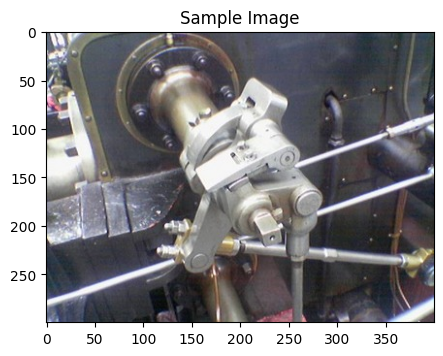

In [2]:
color_img = np.asarray(Image.open("Valve_original_(1).jpg"))
plt.figure(figsize = (5,5))
plt.title("Sample Image")
plt.imshow(color_img)

Converting the Image to Grayscale 

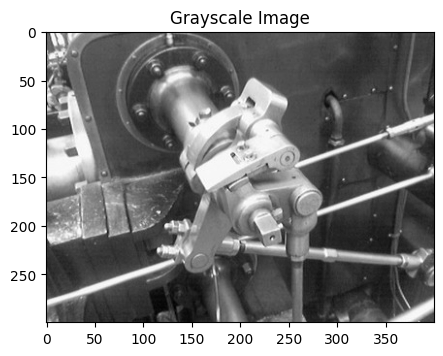

In [3]:
def grayscale(img):
    r,g,b, = img[:,:,0], img[:,:,1], img[:,:,2]
    gray_img = 0.299*r+0.587*g+0.114*b
    return gray_img

gray_img = grayscale(color_img)
plt.figure(figsize = (5,5))
plt.title("Grayscale Image")
plt.imshow(gray_img, cmap= "gray")

Applying Gaussian Filter to smooth Noise from img

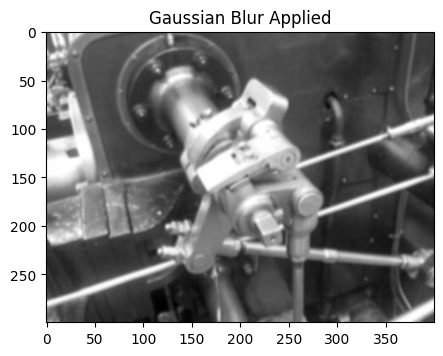

In [4]:
def gaussian_filter(filter_size, sigma):
    kernel = np.zeros((filter_size,filter_size))
    norm_factor = 1/(2.0*np.pi*sigma**2)
    k = (filter_size-1)/2.0

    for i in range(filter_size):
        for j in range(filter_size):
            x = (i-(k+1))**2
            y = (j-(k+1))**2
            kernel[i,j] = norm_factor*np.exp(-(x+y)/(2*sigma**2))
            
    return kernel


g_filter = gaussian_filter(5,1.4) ##using a 5x5 filter and a lambda value of 1
gaussian_blur_img = scipy.ndimage.convolve(gray_img,g_filter)

plt.figure(figsize=(5,5))
plt.title("Gaussian Blur Applied")
plt.imshow(gaussian_blur_img,cmap="gray")


To detect edges we need to detect contrast in pixels, there are multiple different edge detection operators that we can convolve the img with to detect contrast and hence edges. I'm going to be trying Sobel, Roberts, and Prewitts, operators.

(-0.5, 399.5, 299.5, -0.5)

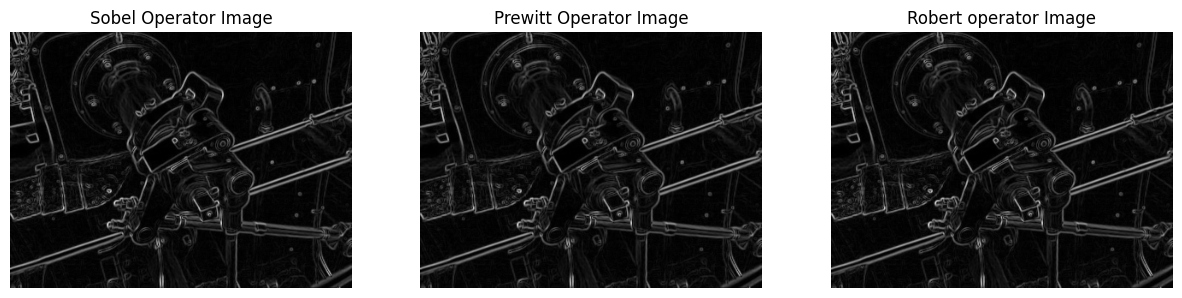

In [5]:
def edge_detect_operation(img, operator):
    #horizontal edges
    if operator == "sobel":
        Mx = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])
        #vertical edges
        My = np.array([[-1,-2,-1],
                    [0,0,0],
                    [1,2,1]])
    elif operator == "prewitt":
        Mx = np.array([[-1,0,1],
                    [-1,0,1],
                    [-1,0,1]])
        #vertical edges
        My = np.array([[-1,-1,-1],
                    [0,0,0],
                    [1,1,1]])
    elif operator == "robert":
        Mx = np.array([[1,0],
                    [0,-1]])
        #vertical edges
        My = np.array([[0,1],
                    [-1,0]])
    
        
    Gx = scipy.ndimage.convolve(img,Mx)
    Gy = scipy.ndimage.convolve(img,My)

    G = np.hypot(Gx,Gy)
    theta = np.arctan2(Gy,Gx)

    return G, theta



sobel_img , sobel_theta= edge_detect_operation(gray_img,"sobel")
prewitt_img , prewitt_theta= edge_detect_operation(gray_img,"prewitt")
robert_img, robert_theta = edge_detect_operation(gray_img,"sobel")


f, imgp = plt.subplots(1,3, figsize = (15,5))

imgp[0].set_title("Sobel Operator Image")
imgp[0].imshow(sobel_img,cmap = "gray")
imgp[0].axis("off")


imgp[1].set_title("Prewitt Operator Image")
imgp[1].imshow(prewitt_img, cmap = "gray")
imgp[1].axis("off")

imgp[2].set_title("Robert operator Image")
imgp[2].imshow(robert_img, cmap = "gray")
imgp[2].axis("off")